In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.signal import welch

In [3]:
# case definition
from study import V27, neutral
from trajectory import Trajectory

# Fixed-Frame-of-Reference Analysis

In [4]:
case = neutral(casedir='WAKEBENCH-NREL_DEBNATH_LES/neutral',
               prefix='NREL_DEBNATH_LES_20190325',
               turbine=V27)

In [5]:
wakedata = {
    '1D Gaussian (Bastankhah)': '1D_Gaussian_Bastankhah',
    '2D Gaussian': '2D_Gaussian',
    'Const area': 'Constant-Area_Contours',
    'Const momentum deficit': 'Constant-Xmom_Contours',
}
suffix = '--filtered'

In [6]:
traj = {}
for name,outdir in wakedata.items():
    traj[name] = Trajectory(case,outdir+suffix)

WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_2D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_3D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_4D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_5D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_6D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_7D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/1D_Gaussian_Bastankhah--filtered/trajectory_8D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_2D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_3D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_4D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_5D.csv
WAKEBENCH-NREL_DEBNATH_LES/neutral/2D_Gaussian--filtered/trajectory_6D.csv
WAKEBENCH-NREL_DEBNATH_

## stats

In [7]:
ydist = [10,]

In [8]:
def make_xlim_symm(ax):
    lims = ax.get_xlim()
    absmax = np.max(np.abs(lims))
    ax.set_xlim((-absmax,absmax))

/Users/equon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/equon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


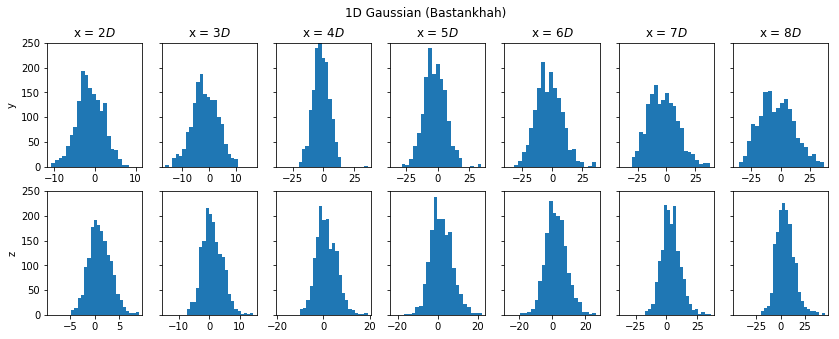

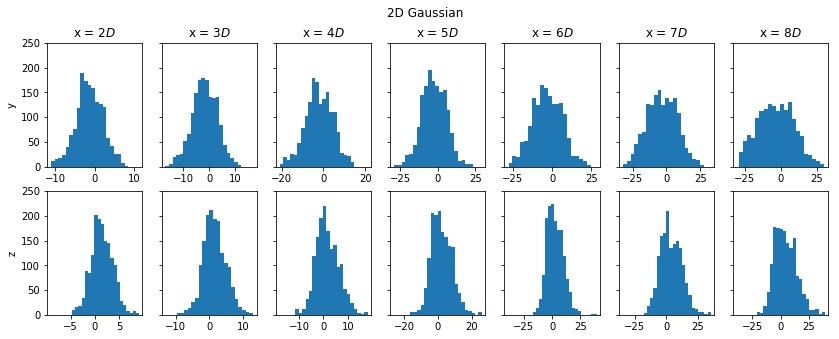

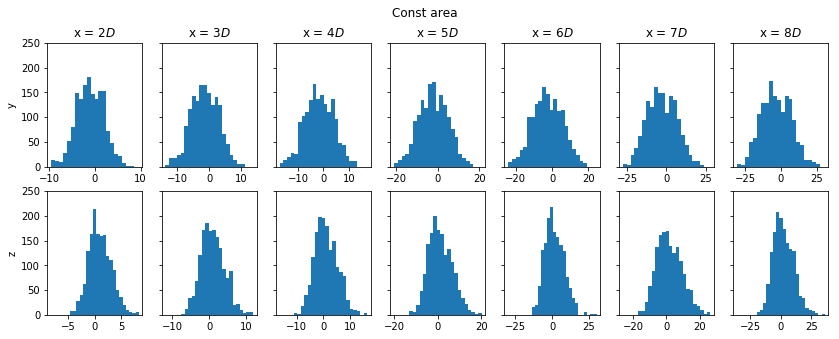

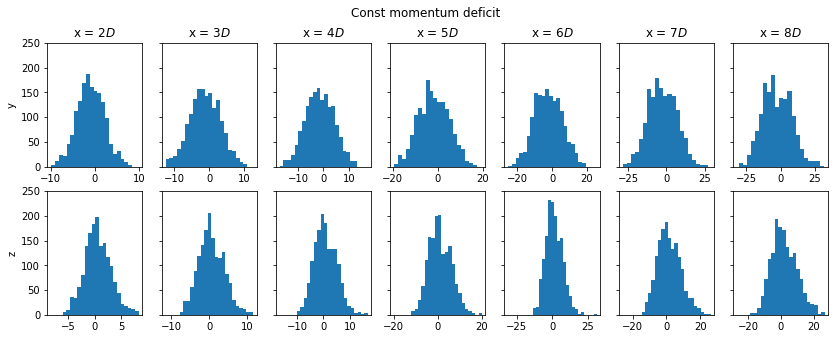

In [9]:
for i,(key,name) in enumerate(wakedata.items()):
    fig,ax = plt.subplots(nrows=2,ncols=len(case.downstreamD),
                          sharey=True,figsize=(14,5))
    wakehist = traj[key].df.unstack()
    yhist = wakehist['y']
    zhist = wakehist['z']
    for i,downD in enumerate(case.downstreamD):
        xval = downD * case.turbine.D
        ax[0,i].hist(yhist[xval], bins=21)
        ax[1,i].hist(zhist[xval], bins=21)
        make_xlim_symm(ax[0,i])
        make_xlim_symm(ax[1,i])
        ax[0,i].set_title(r'x = {:g}$D$'.format(downD))
    ax[0,0].set_ylim((0,250))
    ax[0,0].set_ylabel('y')
    ax[1,0].set_ylabel('z')
    fig.suptitle(key)
    fig.savefig('figures/histograms_{:s}.png'.format(name))

## time domain

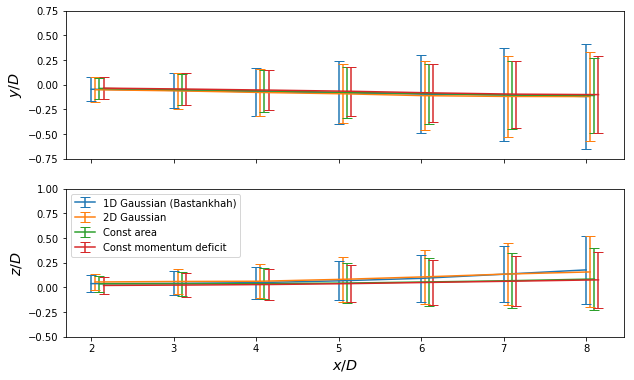

In [10]:
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(10,6))
offset = 0.05
for i,name in enumerate(wakedata.keys()):
    wakehist = traj[name].df.unstack()
    wakepos = wakehist.mean() / case.turbine.D
    wakestdev = wakehist.std() / case.turbine.D
    x_D = np.array(case.downstreamD) + i*offset
    ax[0].errorbar(x_D, wakepos['y'], yerr=wakestdev['y'], capsize=5, label=name)
    ax[1].errorbar(x_D, wakepos['z'], yerr=wakestdev['z'], capsize=5, label=name)
ax[0].set_ylim((-0.75,0.75))
ax[1].set_ylim((-0.5,1))
ax[0].set_ylabel(r'$y/D$', fontsize='x-large')
ax[1].set_ylabel(r'$z/D$', fontsize='x-large')
ax[1].set_xlabel(r'$x/D$', fontsize='x-large')
ax[1].legend()

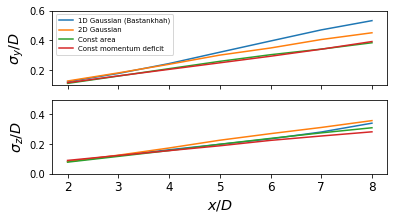

In [11]:
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(6,3))
stdev_wakes_list = []
for i,name in enumerate(wakedata.keys()):
    wakehist = traj[name].df.unstack()
    wakestdev = wakehist.std() / case.turbine.D
    wakestdev.name = name
    stdev_wakes_list.append(wakestdev)
    ax[0].errorbar(case.downstreamD, wakestdev['y'], label=name)
    ax[1].errorbar(case.downstreamD, wakestdev['z'], label=name)
ax[0].set_ylim((0.1,0.6))
ax[1].set_ylim((0,0.5))
ax[0].set_ylabel(r'$\sigma_y/D$', fontsize='x-large')
ax[1].set_ylabel(r'$\sigma_z/D$', fontsize='x-large')
ax[1].set_xlabel(r'$x/D$', fontsize='x-large')
ax[-1].tick_params(axis='x',labelsize='large')
ax[0].legend(fontsize='x-small')
fig.savefig('figures/wake_position_stdev.png',dpi=150,bbox_inches='tight')

In [12]:
stdev_wakes = pd.concat(stdev_wakes_list,axis=1)
stdev_wakes

1D Gaussian (Bastankhah)  2D Gaussian  Const area  \
  x                                                          
y 54.0                   0.121130     0.125922    0.109889   
  81.0                   0.176910     0.180585    0.159305   
  108.0                  0.243499     0.238591    0.209152   
  135.0                  0.320041     0.300576    0.258517   
  162.0                  0.395724     0.348565    0.303253   
  189.0                  0.470668     0.405656    0.340908   
  216.0                  0.533008     0.451233    0.383925   
z 54.0                   0.082778     0.082851    0.078666   
  81.0                   0.122716     0.125527    0.117560   
  108.0                  0.162183     0.174118    0.156675   
  135.0                  0.198742     0.226428    0.199213   
  162.0                  0.235807     0.270808    0.238711   
  189.0                  0.281854     0.312552    0.276061   
  216.0                  0.341458     0.358752    0.310518   

         Const momentum deficit  
  x                              
y 54.0                 0.114473  
  81.0                 0.160407  
  108.0                0.204511  
  135.0                0.248577  
  162.0                0.292970  
  189.0                0.340333  
  216.0                0.392083  
z 54.0                 0.090326  
  81.0                 0.123584  
  108.0                0.156180  
  135.0                0.188957  
  162.0                0.225430  
  189.0                0.254948  
  216.0                0.283165

In [13]:
stdev_wakes.mean(axis=1)

   x    
y  54.0     0.117853
   81.0     0.169302
   108.0    0.223938
   135.0    0.281928
   162.0    0.335128
   189.0    0.389391
   216.0    0.440062
z  54.0     0.083655
   81.0     0.122347
   108.0    0.162289
   135.0    0.203335
   162.0    0.242689
   189.0    0.281354
   216.0    0.323473
dtype: float64

In [14]:
stdev_wakes.min(axis=1)

   x    
y  54.0     0.109889
   81.0     0.159305
   108.0    0.204511
   135.0    0.248577
   162.0    0.292970
   189.0    0.340333
   216.0    0.383925
z  54.0     0.078666
   81.0     0.117560
   108.0    0.156180
   135.0    0.188957
   162.0    0.225430
   189.0    0.254948
   216.0    0.283165
dtype: float64

In [15]:
stdev_wakes.max(axis=1)

   x    
y  54.0     0.125922
   81.0     0.180585
   108.0    0.243499
   135.0    0.320041
   162.0    0.395724
   189.0    0.470668
   216.0    0.533008
z  54.0     0.090326
   81.0     0.125527
   108.0    0.174118
   135.0    0.226428
   162.0    0.270808
   189.0    0.312552
   216.0    0.358752
dtype: float64

In [16]:
stdev_wakes.max(axis=1) - stdev_wakes.min(axis=1)

   x    
y  54.0     0.016033
   81.0     0.021279
   108.0    0.038988
   135.0    0.071464
   162.0    0.102754
   189.0    0.130335
   216.0    0.149083
z  54.0     0.011661
   81.0     0.007967
   108.0    0.017939
   135.0    0.037471
   162.0    0.045377
   189.0    0.057604
   216.0    0.075587
dtype: float64

## frequency domain

In [17]:
maxlen = len(case.get_inflow(case.downstreamD[-1]))
maxlen

1572

In [18]:
def calc_spectrum(u, Tsegment=600.):
    f, P = welch(u[-maxlen:], fs=1./case.dt,
                 nperseg=int(Tsegment/case.dt),
                 detrend='linear', window='hanning', scaling='density')
    return f,P

1D Gaussian (Bastankhah) x= 54.0 peak periods: 85.71428571428571 66.66666666666666
1D Gaussian (Bastankhah) x= 81.0 peak periods: 85.71428571428571 66.66666666666666
1D Gaussian (Bastankhah) x= 108.0 peak periods: 85.71428571428571 66.66666666666666
1D Gaussian (Bastankhah) x= 135.0 peak periods: 200.0 66.66666666666666
2D Gaussian x= 54.0 peak periods: 85.71428571428571 66.66666666666666
2D Gaussian x= 81.0 peak periods: 85.71428571428571 66.66666666666666
2D Gaussian x= 108.0 peak periods: 85.71428571428571 66.66666666666666
2D Gaussian x= 135.0 peak periods: 85.71428571428571 66.66666666666666
Const area x= 54.0 peak periods: 85.71428571428571 66.66666666666666
Const area x= 81.0 peak periods: 85.71428571428571 66.66666666666666
Const area x= 108.0 peak periods: 85.71428571428571 66.66666666666666
Const area x= 135.0 peak periods: 85.71428571428571 66.66666666666666
Const momentum deficit x= 54.0 peak periods: 85.71428571428571 66.66666666666666
Const momentum deficit x= 81.0 peak p

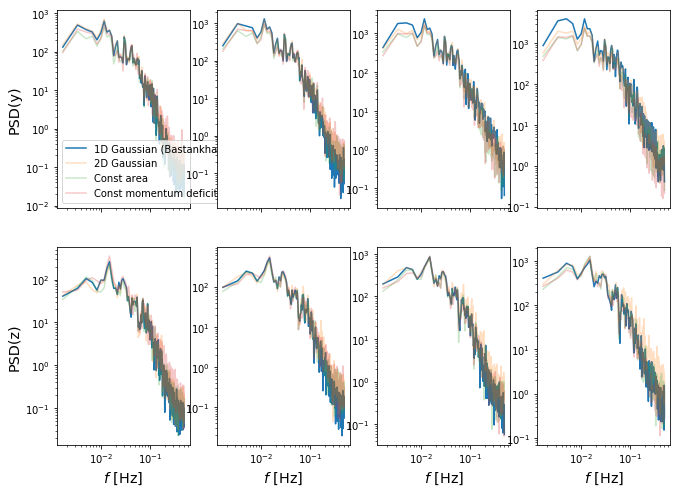

In [19]:
Tseg = 600.
fig,ax = plt.subplots(nrows=2,ncols=4,sharex=True,figsize=(11,8))
for name in wakedata.keys():
    if name.startswith('1D'):
        alpha = 1.0
    else:
        alpha = 0.25
    for j,downD in enumerate(case.downstreamD[:ax.shape[1]]):
        x = downD * case.turbine.D
        wakehist = traj[name].df.xs(x,level='x')
        f,Py = calc_spectrum(wakehist['y'], Tsegment=Tseg)
        f,Pz = calc_spectrum(wakehist['z'], Tsegment=Tseg)
        ax[0,j].loglog(f[1:], Py[1:], label=name, alpha=alpha)
        ax[1,j].loglog(f[1:], Pz[1:], label=name, alpha=alpha)
        iy = np.argmax(Py)
        iz = np.argmax(Pz)
        print(name,'x=',x, 'peak periods:', 1./f[iy], 1./f[iz])
for axi in ax[1,:]:
    axi.set_xlabel(r'$f$ [Hz]', fontsize='x-large')
ax[0,0].set_ylabel('PSD(y)',fontsize='x-large')
ax[1,0].set_ylabel('PSD(z)',fontsize='x-large')
ax[0,0].legend(loc='lower left')

1D Gaussian (Bastankhah) x= 54.0 peak periods: 75.0 75.0
1D Gaussian (Bastankhah) x= 81.0 peak periods: 75.0 75.0
1D Gaussian (Bastankhah) x= 108.0 peak periods: 300.0 75.0
1D Gaussian (Bastankhah) x= 135.0 peak periods: 300.0 75.0
2D Gaussian x= 54.0 peak periods: 75.0 75.0
2D Gaussian x= 81.0 peak periods: 300.0 75.0
2D Gaussian x= 108.0 peak periods: 75.0 75.0
2D Gaussian x= 135.0 peak periods: 300.0 75.0
Const area x= 54.0 peak periods: 300.0 75.0
Const area x= 81.0 peak periods: 75.0 75.0
Const area x= 108.0 peak periods: 75.0 75.0
Const area x= 135.0 peak periods: 75.0 75.0
Const momentum deficit x= 54.0 peak periods: 300.0 75.0
Const momentum deficit x= 81.0 peak periods: 300.0 75.0
Const momentum deficit x= 108.0 peak periods: 75.0 75.0
Const momentum deficit x= 135.0 peak periods: 75.0 75.0


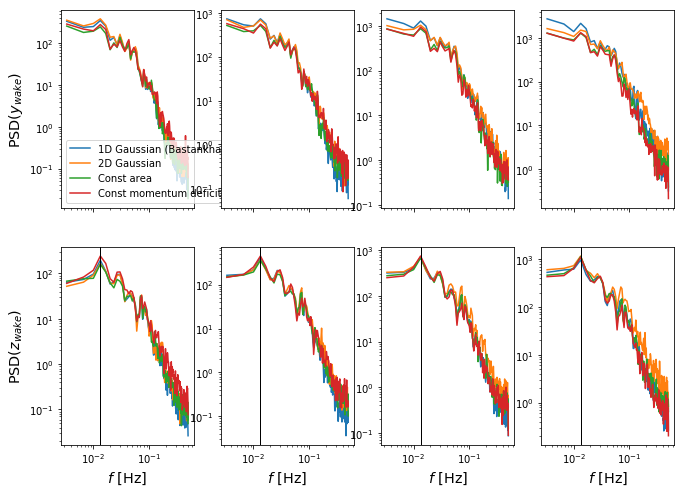

In [20]:
Tseg = 300.
fig,ax = plt.subplots(nrows=2,ncols=4,sharex=True,figsize=(11,8))
for name in wakedata.keys():
    for j,downD in enumerate(case.downstreamD[:ax.shape[1]]):
        x = downD * case.turbine.D
        wakehist = traj[name].df.xs(x,level='x')
        f,Py = calc_spectrum(wakehist['y'], Tsegment=Tseg)
        f,Pz = calc_spectrum(wakehist['z'], Tsegment=Tseg)
        ax[0,j].loglog(f[1:], Py[1:], label=name)
        ax[1,j].loglog(f[1:], Pz[1:], label=name)
        iy = np.argmax(Py)
        iz = np.argmax(Pz)
        print(name,'x=',x, 'peak periods:', 1./f[iy], 1./f[iz])
for axi in ax[1,:]:
    axi.axvline(1/75., color='k', lw=1)
    axi.set_xlabel(r'$f$ [Hz]', fontsize='x-large')
ax[0,0].set_ylabel(r'PSD($y_{wake}$)',fontsize='x-large')
ax[1,0].set_ylabel(r'PSD($z_{wake}$)',fontsize='x-large')
ax[0,0].legend(loc='lower left')

## calculate spectra of the inflow

In [21]:
ds = xr.open_dataset(case.get_wake_datafile(case.upstreamD))

Selected datafile: WAKEBENCH-NREL_DEBNATH_LES/neutral/NREL_DEBNATH_LES_20190325_uvw_-2.5D.nc


In [22]:
khub = np.argmin(np.abs(ds.coords['z'] - case.turbine.zhub))
print(khub, ds.coords['z'][khub])

<xarray.DataArray 'z' ()>
array(64) <xarray.DataArray 'z' ()>
array(32.3016)
Coordinates:
    z        float64 32.3


In [23]:
x_upstream = ds.coords['x'].values[0]
z_nearhub = ds.coords['z'].values[khub]

In [24]:
hubinflow = ds.sel(dict(x=x_upstream, z=z_nearhub))
hubinflow

<xarray.Dataset>
Dimensions:  (t: 1663, y: 162)
Coordinates:
  * t        (t) uint16 16150 16151 16152 16153 ... 17809 17810 17811 17812
    x        float64 -67.5
  * y        (y) float64 -40.0 -39.51 -39.01 -38.51 ... 38.51 39.01 39.51 40.0
    z        float64 32.3
Data variables:
    U        (t, y) float64 ...
    V        (t, y) float64 ...
    W        (t, y) float64 ...

In [25]:
uhub = hubinflow.variables['U']
vhub = hubinflow.variables['V']
whub = hubinflow.variables['W']

In [26]:
%%time
Pu_mean = []
Pv_mean = []
Pw_mean = []
Ny = len(ds.coords['y'])
for j in range(Ny):
    f,Pu = calc_spectrum(uhub[:,j],Tsegment=900.) 
    f,Pv = calc_spectrum(vhub[:,j],Tsegment=900.) 
    f,Pw = calc_spectrum(whub[:,j],Tsegment=900.) 
    Pu_mean.append(Pu)
    Pv_mean.append(Pv)
    Pw_mean.append(Pw)
Pu_mean = sum(Pu_mean) / Ny
Pv_mean = sum(Pv_mean) / Ny
Pw_mean = sum(Pw_mean) / Ny

# CPU times: user 4min 15s, sys: 11.8 s, total: 4min 27s
# Wall time: 51.9 s

CPU times: user 4min 15s, sys: 11.8 s, total: 4min 27s
Wall time: 51.9 s


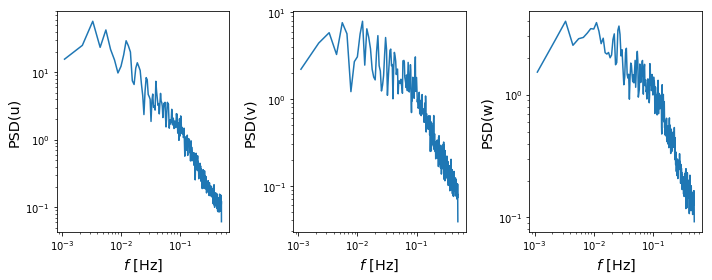

In [30]:
#f_meander = 1/75.
fig,ax = plt.subplots(ncols=3,sharex=True,figsize=(10,4))
ax[0].loglog(f[1:], Pu_mean[1:])
ax[1].loglog(f[1:], Pv_mean[1:])
ax[2].loglog(f[1:], Pw_mean[1:])
ax[0].set_ylabel('PSD(u)',fontsize='x-large')
ax[1].set_ylabel('PSD(v)',fontsize='x-large')
ax[2].set_ylabel('PSD(w)',fontsize='x-large')
for axi in ax:
    axi.set_xlabel(r'$f$ [Hz]', fontsize='x-large')
# ax[1].axvline(f_meander, color='k', lw=1)
# ax[2].axvline(f_meander, color='k', lw=1)
# ax[1].set_title('y-meander freq: {:g} Hz'.format(f[iy]))
# ax[2].set_title('z-meander freq: {:g} Hz'.format(f[iz]))
fig.tight_layout()

In [28]:
sig_u = np.sqrt(np.trapz(Pu_mean,f))
sig_v = np.sqrt(np.trapz(Pv_mean,f))
sig_w = np.sqrt(np.trapz(Pw_mean,f))
sig_u, sig_v, sig_w

(0.8853653536674959, 0.5947118023707618, 0.5654778917416631)

In [29]:
sig_u / case.Uref

0.1017661326054593